# 2. Artist Layer Options

In [99]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus']=False
# 한글 깨지지 않도록 글씨체 설정
plt.rcParams['font.family'] = 'SeoulHangang'

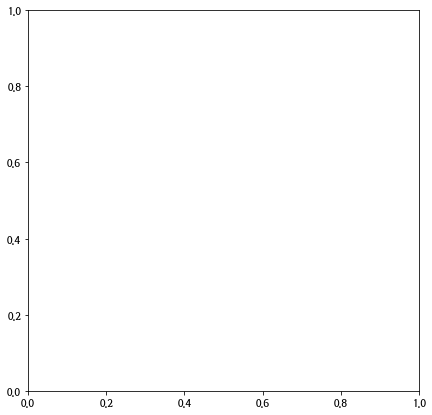

In [2]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.show()

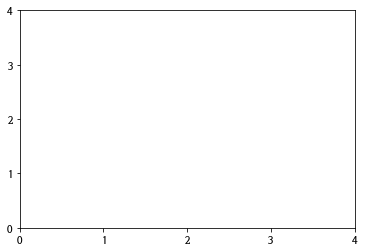

In [3]:
fig, ax = plt.subplots()
ax.set_xticks(range(5))
ax.set_yticks(range(5))
plt.show()

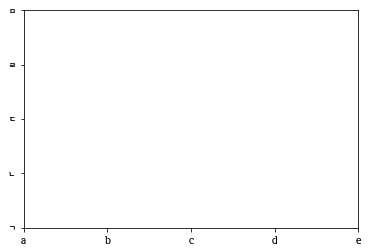

In [4]:
fig, ax = plt.subplots()
ax.set_xticks(range(5))
ax.set_xticklabels(['a', 'b', 'c', 'd', 'e'])
ax.set_yticks(range(5))
ax.set_yticklabels(['ㄱ', 'ㄴ', 'ㄷ', 'ㄹ', 'ㅁ'])
plt.show()

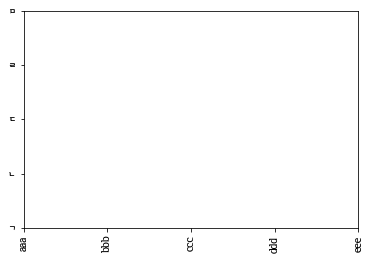

In [5]:
fig, ax = plt.subplots()
ax.set_xticks(range(5))
ax.set_xticklabels(['aaa', 'bbb', 'ccc', 'ddd', 'eee'], rotation=90)
ax.set_yticks(range(5))
ax.set_yticklabels(['ㄱ', 'ㄴ', 'ㄷ', 'ㄹ', 'ㅁ'])
plt.show()

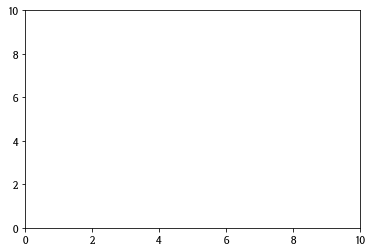

In [6]:
fig, ax = plt.subplots()
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
plt.show()

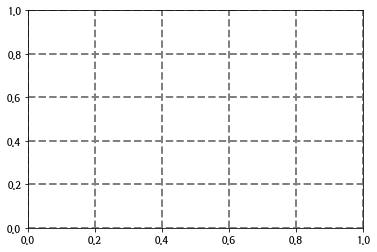

In [11]:
# grid

fig, ax = plt.subplots()
ax.grid(True, color='gray', linestyle='--', linewidth=2)
plt.show()

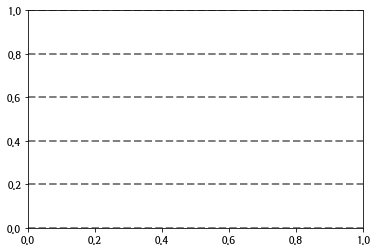

In [17]:
fig, ax = plt.subplots()
ax.grid(True, color='gray', linestyle='--', linewidth=2, axis='y')
plt.show()

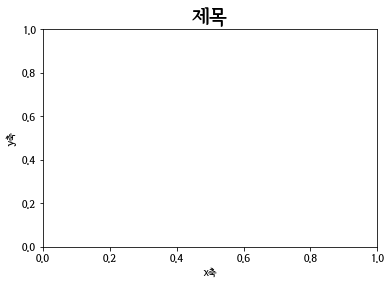

In [19]:
fig, ax = plt.subplots()
ax.set_xlabel('x축')
ax.set_ylabel('y축')
ax.set_title('제목', fontsize=20)
plt.show()

# multiple plot

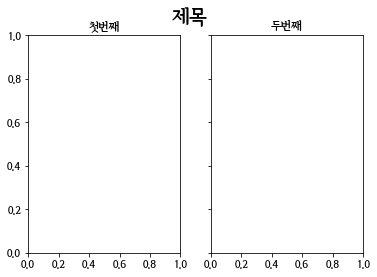

In [25]:
fig, ax= plt.subplots(1,2,sharex=True,sharey=True)
ax[0].set_title('첫번째')
ax[1].set_title('두번째')
fig.suptitle('제목',fontsize=20)
plt.show()

In [26]:
import numpy as np
x = np.linspace(0, 10, 100)

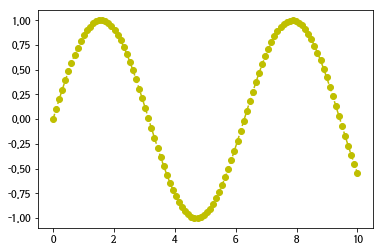

In [31]:
fig,ax=plt.subplots()
ax.plot(x,np.sin(x),linestyle='--',marker='o',color='y')
plt.show()

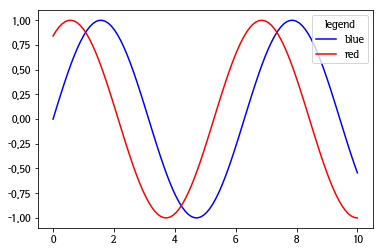

In [32]:
fig,ax=plt.subplots()
ax.plot(x,np.sin(x),color='b',label='blue')
ax.plot(x,np.sin(x+1),color='r',label='red')
ax.legend(title='legend',loc='upper right')
plt.show()

## twinx (잘 숙지!)

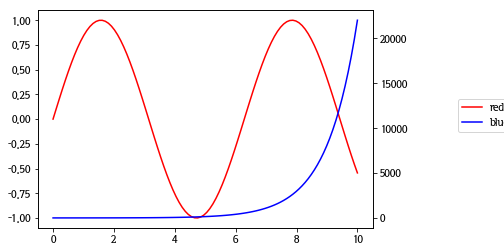

In [33]:
fig,ax=plt.subplots()
ax.plot(x,np.sin(x),color='r',label='red')
ax2=ax.twinx()
ax2.plot(x,np.exp(x),color='b',label='blue')
fig.legend(bbox_to_anchor=(1.2,0.55))
plt.show()

## annotation (주석)

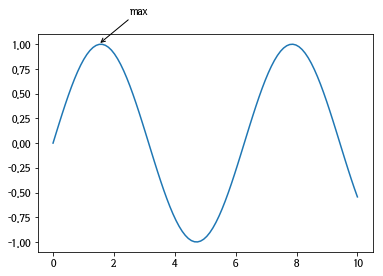

In [37]:
fig,ax=plt.subplots()
ax.plot(x,np.sin(x))
ax.annotate('max',xy=(1.5,1),xytext=(2.5,1.3),arrowprops={'arrowstyle':'->','color':'black'})
plt.show()

# 3. Time-Series Graph

In [38]:
# 크롤링

import pandas as pd
import requests
from bs4 import BeautifulSoup

In [39]:
def get_price(company_code):
    url = "https://fchart.stock.naver.com/sise.nhn?symbol={}&timeframe=day&count=100&requestType=0".format(company_code)
    get_result = requests.get(url)
    bs_obj = BeautifulSoup(get_result.content, "html.parser")

    inf = bs_obj.select('item')
    columns = ['Date', 'Open' ,'High', 'Low', 'Close', 'Volume']
    df_inf = pd.DataFrame([], columns = columns, index = range(len(inf)))
    
    for i in range(len(inf)):
        df_inf.iloc[i] = str(inf[i]['data']).split('|')
    
    df_inf.index = pd.to_datetime(df_inf['Date'])
    
    return df_inf.drop('Date', axis=1).astype(float)

In [40]:
kakao = get_price('035720')

In [41]:
kakao

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-05,182500.0,183000.0,176500.0,179500.0,821744.0
2020-03-06,176500.0,178500.0,174000.0,175500.0,568424.0
2020-03-09,171000.0,171500.0,166000.0,167500.0,805638.0
2020-03-10,164500.0,174500.0,164000.0,173000.0,950875.0
2020-03-11,172000.0,174500.0,167000.0,169000.0,550227.0
...,...,...,...,...,...
2020-07-22,310500.0,321500.0,306000.0,318000.0,1159298.0
2020-07-23,316500.0,329500.0,315000.0,329500.0,1260435.0
2020-07-24,325000.0,333000.0,322000.0,324500.0,907643.0


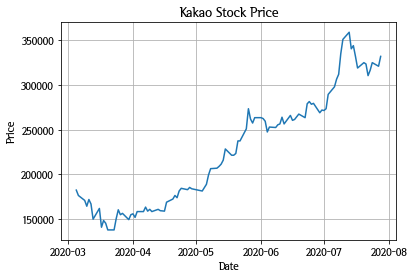

In [42]:
# X축에 날짜 등과 같은 인덱스가 들어감

fig,ax=plt.subplots()
ax.plot(kakao.index, kakao['Open'])
ax.grid(True)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Kakao Stock Price')
plt.show()

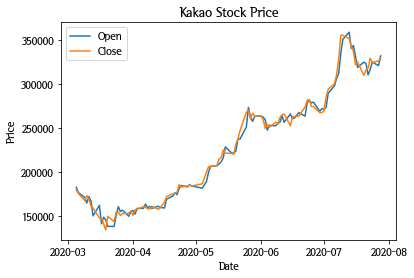

In [44]:
fig,ax=plt.subplots()
ax.plot(kakao.index,kakao['Open'],label='Open')
ax.plot(kakao.index,kakao['Close'],label='Close')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Kakao Stock Price')
ax.legend()
plt.show()

In [45]:
kakao_diff = kakao.diff().dropna() # 차이 계산 (델타)

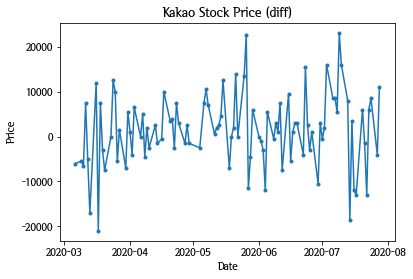

In [49]:
fig,ax=plt.subplots()
ax.plot(kakao_diff.index,kakao_diff['Open'],marker='.')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Kakao Stock Price (diff)')
plt.show()

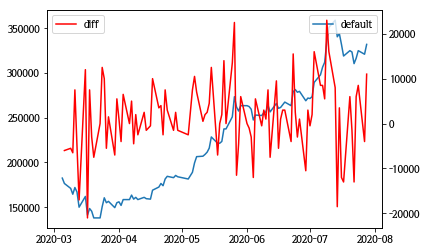

In [51]:
fig,ax=plt.subplots()
ax.plot(kakao.index,kakao['Open'],label='default')
ax2=ax.twinx()
ax2.plot(kakao_diff.index,kakao_diff['Open'],color='r',label='diff')
ax.legend(loc='upper right')
ax2.legend(loc='upper left')
plt.show()

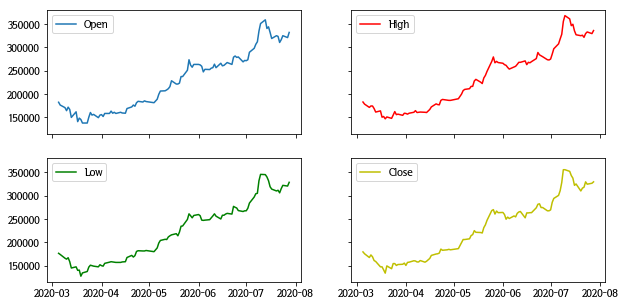

In [52]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,5))
ax[0, 0].plot(kakao.index, kakao['Open'], label='Open')
ax[0, 1].plot(kakao.index, kakao['High'], color='r', label='High')
ax[1, 0].plot(kakao.index, kakao['Low'], color='g', label='Low')
ax[1, 1].plot(kakao.index, kakao['Close'], color='y', label='Close')
ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
ax[1, 1].legend()
plt.show()

# 4. Pi-Chart

In [59]:
# 크롤링

covid = pd.read_html('http://ncov.mohw.go.kr/bdBoardList_Real.do?brdId=1&brdGubun=13&ncvContSeq=&contSeq=&board_id=&gubun=', encoding='utf8')
covid = covid[0]
covid.columns = ['시도명', '합계', '해외유입', '국내발생', '확진환자', '격리중', '격리해제', '사망자', '발생률']
covid = covid.drop([0, 18])
covid = covid.set_index('시도명')
covid

,합계,해외유입,국내발생,확진환자,격리중,격리해제,사망자,발생률
시도명,,,,,,,,
서울,6,3,3,1580,169,1400,11,16.23
부산,2,1,1,170,16,151,3,4.98
대구,0,0,0,6939,11,6737,191,284.80
인천,0,0,0,380,21,357,2,12.85
광주,0,0,0,203,74,127,2,13.94
대전,0,0,0,166,13,151,2,11.26
울산,0,0,0,58,4,53,1,5.06
세종,0,0,0,50,0,50,0,14.61
경기,6,5,1,1520,199,1291,30,11.47


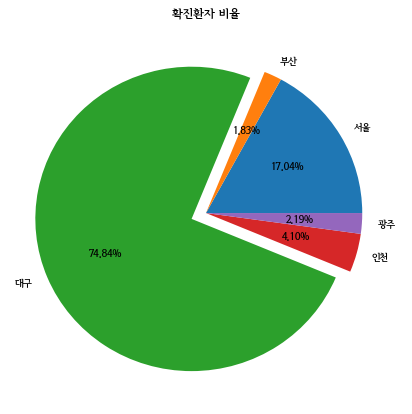

In [70]:
fig,ax=plt.subplots(figsize=(7,7))
ax.pie(covid.iloc[:5,3],labels=covid.index[:5],autopct='%.2f%%',explode=(0, 0, 0.1, 0, 0))

# explode: 파이차트에서 분리되는 정도를 설정
# autopct: 자동으로 퍼센트 입력
# -> %.nf%%' : 소수점 n번째 자리까지 나타냄
# shadow: 그림자를 설정

ax.set_title('확진환자 비율')
plt.show()

# 5. Bar-Chart

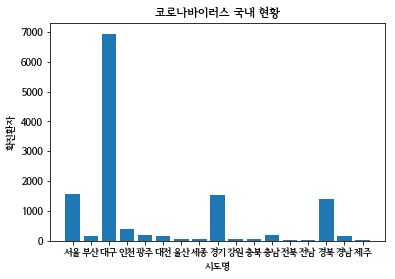

In [71]:
fig,ax=plt.subplots()
ax.bar(covid.index,covid['확진환자'])
ax.set_xlabel('시도명')
ax.set_ylabel('확진환자')
ax.set_title('코로나바이러스 국내 현황')
plt.show()

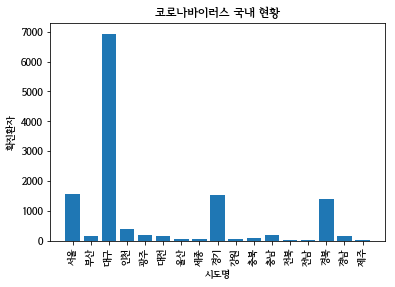

In [72]:
fig,ax=plt.subplots()
ax.bar(covid.index,covid['확진환자'])
ax.set_xticklabels(covid.index,rotation=90)
ax.set_xlabel('시도명')
ax.set_ylabel('확진환자')
ax.set_title('코로나바이러스 국내 현황')
plt.show()

## bar에 여러개 정보 겹쳐 표현하기

### bottom= 이용

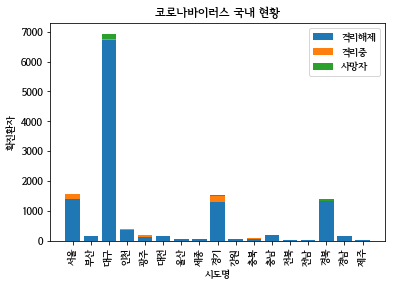

In [73]:
fig, ax = plt.subplots()
ax.bar(covid.index,covid['격리해제'],label='격리해제')
ax.bar(covid.index,covid['격리중'],bottom=covid['격리해제'],label='격리중')
ax.bar(covid.index,covid['사망자'],bottom=covid['격리해제']+covid['격리중'],label='사망자')
ax.set_xticklabels(covid.index,rotation=90)
ax.set_xlabel('시도명')
ax.set_ylabel('확진환자')
ax.set_title('코로나바이러스 국내 현황')
ax.legend()
plt.show()

# 6. Histogram

In [74]:
from sklearn.datasets import load_iris
load_iris = load_iris()
iris = pd.DataFrame(data=load_iris.data, columns=load_iris.feature_names)
iris['species'] = load_iris.target
setosa = iris[iris['species']==0]
versicolor = iris[iris['species']==1]
virginica = iris[iris['species']==2]

In [78]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


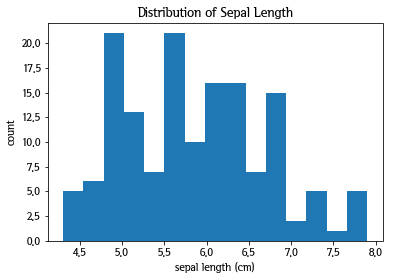

In [87]:
fig,ax=plt.subplots()
ax.hist(iris['sepal length (cm)'], bins=15)
# bins: 막대의 개수 
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('count')
ax.set_title('Distribution of Sepal Length')
plt.show()

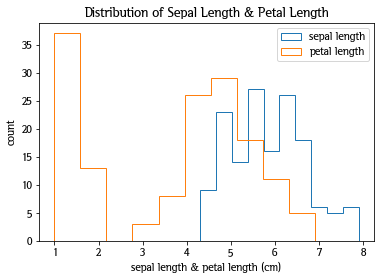

In [88]:
fig,ax=plt.subplots()
ax.hist(iris['sepal length (cm)'], histtype='step',label='sepal length')
ax.hist(iris['petal length (cm)'], histtype='step',label='petal length')
ax.set_xlabel('sepal length & petal length (cm)')
ax.set_ylabel('count')
ax.set_title('Distribution of Sepal Length & Petal Length')
ax.legend()
plt.show()

# 7. Violin-Plot

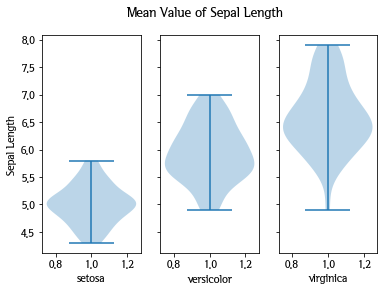

In [89]:
fig,ax=plt.subplots(1,3,sharex=True,sharey=True)
ax[0].violinplot(setosa['sepal length (cm)'])
ax[1].violinplot(versicolor['sepal length (cm)'])
ax[2].violinplot(virginica['sepal length (cm)'])
fig.suptitle('Mean Value of Sepal Length')
ax[0].set_xlabel('setosa')
ax[1].set_xlabel('versicolor')
ax[2].set_xlabel('virginica')
ax[0].set_ylabel('Sepal Length')
plt.show()

# 8. Box-Plot

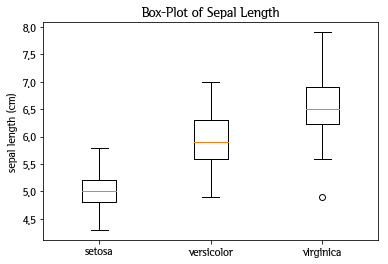

In [91]:
fig, ax= plt.subplots()
ax.boxplot([setosa['sepal length (cm)'], versicolor['sepal length (cm)'], virginica['sepal length (cm)']])
ax.set_xticklabels(['setosa', 'versicolor', 'virginica'])
ax.set_ylabel('sepal length (cm)')
ax.set_title('Box-Plot of Sepal Length')
plt.show()

# 9. Scatter-Plot

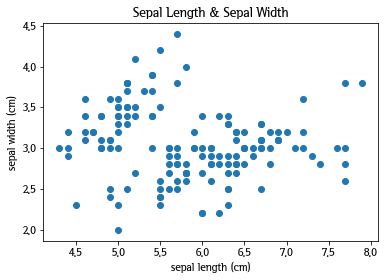

In [92]:
fig,ax=plt.subplots()
ax.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'])
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_title('Sepal Length & Sepal Width')
plt.show()

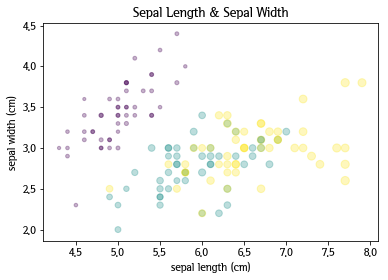

In [93]:
fig,ax=plt.subplots()
ax.scatter(iris['sepal length (cm)'],iris['sepal width (cm)'],c=iris['species'],s=iris['petal length (cm)']*10, alpha=0.3)
# c: marker의 색상
# s: marker의 크기
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_title('Sepal Length & Sepal Width')
plt.show()

# 10. Change the Style

In [95]:
plt.style.use('ggplot')

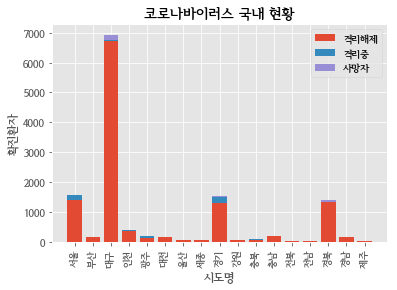

In [96]:
fig, ax = plt.subplots()
ax.bar(covid.index, covid['격리해제'], label='격리해제')
ax.bar(covid.index, covid['격리중'], bottom=covid['격리해제'], label='격리중')
ax.bar(covid.index, covid['사망자'], bottom=covid['격리해제'] + covid['격리중'], label='사망자')
ax.set_xticklabels(covid.index, rotation=90)
ax.set_xlabel('시도명')
ax.set_ylabel('확진환자')
ax.set_title('코로나바이러스 국내 현황')
ax.legend()
plt.show()

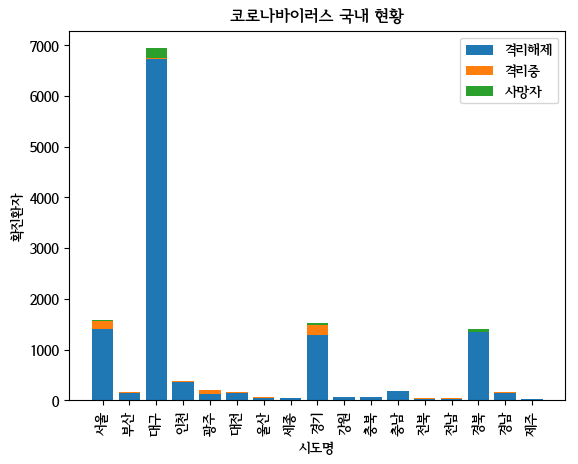

In [111]:
plt.style.use('default')
plt.rcParams['font.family'] = 'SeoulHangang'
# 글씨체까지 바뀜 유의
fig, ax = plt.subplots()
ax.bar(covid.index, covid['격리해제'], label='격리해제')
ax.bar(covid.index, covid['격리중'], bottom=covid['격리해제'], label='격리중')
ax.bar(covid.index, covid['사망자'], bottom=covid['격리해제'] + covid['격리중'], label='사망자')
ax.set_xticklabels(covid.index, rotation=90)
ax.set_xlabel('시도명')
ax.set_ylabel('확진환자')
ax.set_title('코로나바이러스 국내 현황')
ax.legend()
plt.show()

In [102]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


# 11. Quiz

## Quiz 1

In [117]:
import pandas as pd
data1=pd.read_csv('quiz1.csv',index_col='일')
data1

,해외유입,국내발생
일,,
07-15,28,11
07-16,47,14
07-17,39,21
07-18,28,11
07-19,13,21
07-20,22,4
07-21,25,20


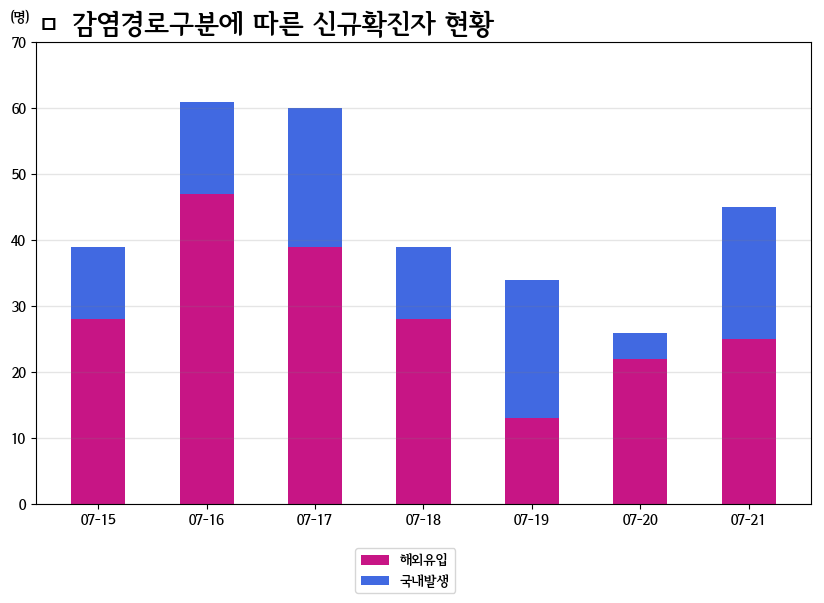

In [189]:
fig,ax=plt.subplots(figsize=(10,6))
ax.grid(True, color='gray', linewidth=1, axis='y', alpha=0.2, zorder=0)
# zorder: 숫자가 클수록 앞으로 옴
ax.bar(data1.index,data1['해외유입'],label='해외유입', color='mediumvioletred', width=0.5)
ax.bar(data1.index,data1['국내발생'],bottom=data1['해외유입'],label='국내발생', color='royalblue', width=0.5)
ax.set_title('□ 감염경로구분에 따른 신규확진자 현황', fontsize=20, loc='left')
ax.set_ylabel('(명)', rotation='horizontal')
ax.yaxis.set_label_coords(-0.02,1.04)
ax.set_ylim([0,70])
ax.legend(bbox_to_anchor=(0.55, -0.08))
plt.show()

## Quiz 2

In [144]:
data2=pd.read_csv('quiz2.csv',index_col='일')
data2

,누적 확진환자,일 확진환자
일,,
07-15,13551,39
07-16,13612,61
07-17,13672,60
07-18,13711,39
07-19,13735,34
07-20,13771,26
07-21,13816,45


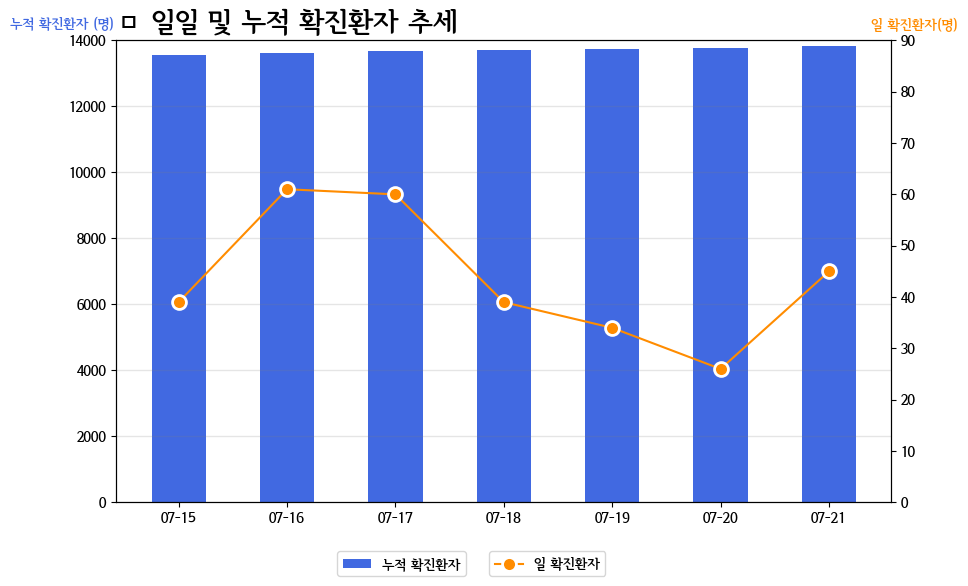

In [182]:
fig,ax=plt.subplots(figsize=(10,6))
ax.grid(True, color='gray', linewidth=1, axis='y', alpha=0.2, zorder=0)
ax.bar(data2.index,data2['누적 확진환자'],label='누적 확진환자', color='royalblue', width=0.5)
ax.set_ylim([0,14000])
ax.set_ylabel('누적 확진환자 (명)',rotation='horizontal', color='royalblue')
ax.yaxis.set_label_coords(-0.07,1.02)
ax2=ax.twinx()
ax2.plot(data2.index,data2['일 확진환자'],label='일 확진환자', 
         ms=10, mec='white', mew=2, color='darkorange', marker='o')
# ms: markersize
# mec: marker의 color (markeredgecolor)
# mew: marker의 width (markeredgewidth)
# mfc: marker의 내부 색 (markerfacecolor)
ax2.set_ylim([0,90])
ax2.set_ylabel('일 확진환자(명)', rotation='horizontal', color='darkorange')
ax2.yaxis.set_label_coords(1.03,1.05)
ax.set_title('□ 일일 및 누적 확진환자 추세', fontsize=20, loc='left')
ax.legend(bbox_to_anchor=(0.46, -0.09))
ax2.legend(bbox_to_anchor=(0.64, -0.09))
plt.show()